## Downloading the important dependencies

In [2]:
!pip install ultralytics opencv-python gtts flask flask-ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 18.5 MB/s eta 0:00:0000:01


In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.


### Downloading the dataset for finetuning our model

In [4]:
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="FxDpGT04S6NBTOkBEbAb")

# Load the dataset
project = rf.workspace("all-mix").project("visually-impaired-dataset")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Visually-impaired-dataset-2 in yolov8:: 100%|██████████| 6662/6662 [00:00<00:00, 7391.41it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import os

# Path to the dataset
dataset_path = "/kaggle/working/Visually-impaired-dataset-2"

# List files in the dataset
print("Train images:", os.listdir(os.path.join(dataset_path, "train", "images")))
print("Train labels:", os.listdir(os.path.join(dataset_path, "train", "labels")))
print("Validation images:", os.listdir(os.path.join(dataset_path, "valid", "images")))
print("Validation labels:", os.listdir(os.path.join(dataset_path, "valid", "labels")))

Train images: ['017566_leftImg8bit_png.rf.d1144de0b2b15098365b5e5fcd7ceecb.jpg', 'gambar-386-_jpg.rf.e40225ad6ef0966c1d8be7e0238bb8f1.jpg', '096376_leftImg8bit_png.rf.e8689d0b09023795efde10a4610c50ed.jpg', '009179_leftImg8bit_png.rf.9e2d57d45f5fb37dbc35b8e93ea1e865.jpg', '857268_leftImg8bit_png.rf.e0dffad652811f9117d84cc31ad77992.jpg', 'WhatsApp-Image-2024-07-31-at-2-56-01-PM_jpeg.rf.3d3f77424d06a30c7252d0e9438de35a.jpg', '132412_leftImg8bit_png.rf.cd1a5212a2d78eb67c6072297c21455a.jpg', '345684_leftImg8bit_png.rf.e2cde46a98eeed5c2cc6a92465f585e6.jpg', '518831_leftImg8bit_png.rf.8b5b6749fe2ea6f444f1fa3e3f475923.jpg', '017090_leftImg8bit_png.rf.126ac961c8c3e205f436d33edabbfe3f.jpg', '070068_leftImg8bit_png.rf.527195e0c8c65ae01488bdbd0b11f49e.jpg', 'gambar-673-_jpg.rf.bad176ceda32afb1bbf5d47ece1861fc.jpg', '418374_leftImg8bit_png.rf.c0633dbcd16bff35ed1a8d2a0153cffd.jpg', '673009_leftImg8bit_png.rf.a29fe1c7bde645d653b34bada3f3b4d0.jpg', '083576_leftImg8bit_png.rf.bedad2b78802f56ceff9144e83

### Loading the YOLO model for training

In [6]:
from ultralytics import YOLO

# Load a YOLOv8 model 
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 86.7MB/s]


In [7]:
!pip install tensorboard

### Finetuning the model with our dataset

In [8]:
from ultralytics import YOLO

# Loading YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model with TensorBoard logging
results = model.train(
    data="/kaggle/working/Visually-impaired-dataset-2/data.yaml",
    epochs=50,
    imgsz=640,
    project="my_yolo_project",  
    name="visually_impaired_model"  
)

Ultralytics 8.3.81 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Visually-impaired-dataset-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=my_yolo_project, name=visually_impaired_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 18.1MB/s]


Overriding model.yaml nc=80 with nc=30

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Visually-impaired-dataset-2/train/labels... 2523 images, 134 backgrounds, 0 corrupt: 100%|██████████| 2523/2523 [00:02<00:00, 1188.23it/s]


train: New cache created: /kaggle/working/Visually-impaired-dataset-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 288, len(boxes) = 6376. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/Visually-impaired-dataset-2/valid/labels... 515 images, 23 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<00:00, 1055.51it/s]


val: New cache created: /kaggle/working/Visually-impaired-dataset-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 45, len(boxes) = 1258. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to my_yolo_project/visually_impaired_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000294, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to my_yolo_project/visually_impaired_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.14G      1.585      3.942      1.426         50        640: 100%|██████████| 158/158 [00:27<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.10it/s]


                   all        515       1258      0.813      0.133      0.117     0.0734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.1G      1.487      2.663      1.357         56        640: 100%|██████████| 158/158 [00:25<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.50it/s]

                   all        515       1258      0.733      0.192       0.22      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.12G      1.463      2.401      1.349         51        640: 100%|██████████| 158/158 [00:26<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.51it/s]

                   all        515       1258      0.652      0.248       0.23       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.13G      1.418      2.202      1.334         48        640: 100%|██████████| 158/158 [00:25<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        515       1258      0.615      0.281      0.289      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.11G      1.412      2.127      1.333         49        640: 100%|██████████| 158/158 [00:25<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.47it/s]

                   all        515       1258      0.505      0.265       0.28      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.12G      1.391      2.055      1.319         48        640: 100%|██████████| 158/158 [00:24<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.99it/s]

                   all        515       1258      0.414      0.292      0.285      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.11G      1.363       1.95      1.306         45        640: 100%|██████████| 158/158 [00:24<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.55it/s]

                   all        515       1258      0.457      0.366      0.314      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.12G       1.37      1.908      1.306         40        640: 100%|██████████| 158/158 [00:25<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.53it/s]

                   all        515       1258      0.552      0.302      0.323        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.11G      1.344      1.843      1.282         37        640: 100%|██████████| 158/158 [00:25<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.52it/s]

                   all        515       1258       0.39      0.369      0.322      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.12G      1.356      1.818       1.29         36        640: 100%|██████████| 158/158 [00:25<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.42it/s]

                   all        515       1258      0.459      0.334      0.321      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.1G      1.321      1.723      1.273         36        640: 100%|██████████| 158/158 [00:25<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.53it/s]

                   all        515       1258      0.535      0.333      0.342      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.14G      1.322      1.713      1.271         47        640: 100%|██████████| 158/158 [00:25<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.58it/s]

                   all        515       1258      0.532      0.323      0.368      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.1G      1.307      1.678      1.265         46        640: 100%|██████████| 158/158 [00:25<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.60it/s]

                   all        515       1258      0.521      0.327      0.357      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.1G      1.295      1.613       1.25         43        640: 100%|██████████| 158/158 [00:25<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.59it/s]

                   all        515       1258      0.481      0.331      0.359      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.1G      1.288      1.613      1.253         49        640: 100%|██████████| 158/158 [00:25<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.57it/s]

                   all        515       1258       0.43      0.405      0.399      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.13G      1.285      1.601      1.254         35        640: 100%|██████████| 158/158 [00:25<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.57it/s]

                   all        515       1258      0.544      0.407      0.387      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.11G      1.277      1.546      1.244         51        640: 100%|██████████| 158/158 [00:25<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]

                   all        515       1258      0.485      0.455      0.406      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.12G      1.262      1.528      1.237         60        640: 100%|██████████| 158/158 [00:25<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        515       1258      0.575      0.367      0.411       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.1G      1.275      1.515      1.241         36        640: 100%|██████████| 158/158 [00:25<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.57it/s]

                   all        515       1258      0.521      0.375      0.405      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.12G      1.255      1.477      1.228         50        640: 100%|██████████| 158/158 [00:25<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.42it/s]

                   all        515       1258      0.519      0.443      0.401      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.11G      1.258      1.469      1.227         35        640: 100%|██████████| 158/158 [00:25<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        515       1258      0.529      0.419      0.428      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.11G      1.225      1.442      1.214         41        640: 100%|██████████| 158/158 [00:25<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        515       1258      0.583      0.341      0.413      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.1G      1.233      1.418      1.209         53        640: 100%|██████████| 158/158 [00:26<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.41it/s]

                   all        515       1258      0.459      0.445      0.415      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.12G      1.231      1.419      1.215         48        640: 100%|██████████| 158/158 [00:25<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.34it/s]

                   all        515       1258      0.472      0.434      0.432      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.1G      1.228      1.393       1.22         56        640: 100%|██████████| 158/158 [00:25<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.44it/s]

                   all        515       1258      0.434      0.488      0.442      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.1G      1.221      1.394      1.208         35        640: 100%|██████████| 158/158 [00:25<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.51it/s]

                   all        515       1258      0.426      0.453      0.417      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.11G      1.221      1.371      1.212         48        640: 100%|██████████| 158/158 [00:25<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.45it/s]

                   all        515       1258      0.638      0.379      0.437      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.11G      1.216      1.346      1.203         62        640: 100%|██████████| 158/158 [00:25<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.34it/s]

                   all        515       1258      0.531      0.359      0.424       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.08G      1.216      1.325      1.199         48        640: 100%|██████████| 158/158 [00:25<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.03it/s]

                   all        515       1258      0.477      0.401      0.423      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.12G      1.195      1.313      1.194         63        640: 100%|██████████| 158/158 [00:25<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.37it/s]

                   all        515       1258      0.489      0.429      0.449      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.1G      1.214      1.327      1.204         42        640: 100%|██████████| 158/158 [00:25<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.59it/s]

                   all        515       1258      0.505      0.386      0.417      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.1G      1.199      1.303      1.196         34        640: 100%|██████████| 158/158 [00:25<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.57it/s]

                   all        515       1258      0.509      0.474      0.447      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.11G      1.175      1.277      1.181         45        640: 100%|██████████| 158/158 [00:25<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.58it/s]

                   all        515       1258      0.487      0.463      0.451      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.1G      1.181      1.242      1.177         32        640: 100%|██████████| 158/158 [00:25<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.58it/s]

                   all        515       1258      0.514      0.431      0.462      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.11G      1.185      1.241      1.182         63        640: 100%|██████████| 158/158 [00:25<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.55it/s]

                   all        515       1258       0.49      0.419      0.458       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.11G      1.187      1.257      1.187         55        640: 100%|██████████| 158/158 [00:25<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.43it/s]

                   all        515       1258      0.459      0.426      0.452      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.11G      1.165      1.225      1.176         41        640: 100%|██████████| 158/158 [00:25<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.60it/s]

                   all        515       1258      0.595       0.42      0.455      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.1G      1.177      1.239      1.178         35        640: 100%|██████████| 158/158 [00:25<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.57it/s]

                   all        515       1258       0.52      0.414      0.455      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.1G       1.17      1.213      1.174         50        640: 100%|██████████| 158/158 [00:25<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.40it/s]

                   all        515       1258      0.581      0.426      0.458      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.14G      1.168      1.191      1.164         45        640: 100%|██████████| 158/158 [00:25<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        515       1258      0.406      0.467      0.448      0.295


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.08G      1.143      1.106      1.176         29        640: 100%|██████████| 158/158 [00:25<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        515       1258       0.55      0.404      0.448      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.1G      1.115      1.051      1.162         33        640: 100%|██████████| 158/158 [00:24<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.52it/s]

                   all        515       1258      0.466      0.445      0.457      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.08G      1.107      1.029      1.158         19        640: 100%|██████████| 158/158 [00:25<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.55it/s]

                   all        515       1258      0.563      0.431      0.462      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.1G      1.116      1.032      1.164         27        640: 100%|██████████| 158/158 [00:25<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.52it/s]

                   all        515       1258      0.578      0.435      0.492      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.08G      1.086          1      1.146         30        640: 100%|██████████| 158/158 [00:25<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.47it/s]

                   all        515       1258      0.545       0.44      0.472      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.1G      1.093     0.9982      1.142         25        640: 100%|██████████| 158/158 [00:25<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.61it/s]

                   all        515       1258      0.482      0.467      0.472      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.08G      1.082      1.002      1.148         26        640: 100%|██████████| 158/158 [00:25<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.51it/s]

                   all        515       1258      0.495      0.478      0.484      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       2.1G       1.09     0.9968      1.146         21        640: 100%|██████████| 158/158 [00:25<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.57it/s]

                   all        515       1258      0.495       0.49      0.481       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.08G      1.089      0.992      1.142         28        640: 100%|██████████| 158/158 [00:25<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.46it/s]

                   all        515       1258      0.552      0.455       0.48      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.09G      1.074     0.9641       1.14         23        640: 100%|██████████| 158/158 [00:24<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        515       1258      0.493      0.464      0.481      0.322



50 epochs completed in 0.410 hours.
Optimizer stripped from my_yolo_project/visually_impaired_model/weights/last.pt, 6.3MB
Optimizer stripped from my_yolo_project/visually_impaired_model/weights/best.pt, 6.3MB

Validating my_yolo_project/visually_impaired_model/weights/best.pt...
Ultralytics 8.3.81 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,011,498 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]


                   all        515       1258      0.576      0.435      0.492      0.331
          Dog ahead at          3          3      0.866      0.667       0.67      0.469
         Door ahead at          3          3      0.935          1      0.995      0.708
        Table ahead at          2          2          0          0      0.181      0.141
         auto ahead at         88        106       0.78      0.811      0.837      0.616
      barrier ahead at         35         56      0.852      0.515      0.609       0.34
        bench ahead at          1          1      0.288          1      0.995      0.895
      bicycle ahead at         16         16      0.765      0.688      0.703      0.383
          bus ahead at         30         34      0.781      0.618      0.757      0.604
          car ahead at        217        309      0.828      0.828      0.872       0.67
        chair ahead at          4          6      0.721      0.333      0.538      0.323
      dustbin ahead a

invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to my_yolo_project/visually_impaired_model


In [9]:
# Validate the model
results = model.val()

Ultralytics 8.3.81 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,011,498 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/Visually-impaired-dataset-2/valid/labels.cache... 515 images, 23 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 45, len(boxes) = 1258. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  6.29it/s]


                   all        515       1258      0.577      0.435      0.492      0.332
          Dog ahead at          3          3      0.867      0.667       0.67      0.469
         Door ahead at          3          3      0.932          1      0.995      0.708
        Table ahead at          2          2          0          0      0.181      0.141
         auto ahead at         88        106      0.781      0.811      0.837      0.616
      barrier ahead at         35         56      0.853      0.517      0.609      0.347
        bench ahead at          1          1      0.288          1      0.995      0.895
      bicycle ahead at         16         16      0.765      0.688      0.703      0.388
          bus ahead at         30         34      0.781      0.618      0.756        0.6
          car ahead at        217        309      0.825      0.828      0.872      0.669
        chair ahead at          4          6       0.72      0.333      0.538      0.323
      dustbin ahead a

invalid value encountered in less
invalid value encountered in less


Speed: 0.8ms preprocess, 4.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to my_yolo_project/visually_impaired_model2


### Testing the model on some sample images


image 1/1 /kaggle/input/pictures/cement_stairs.jpg: 448x640 1 stairs ahead at, 35.4ms
Speed: 2.2ms preprocess, 35.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


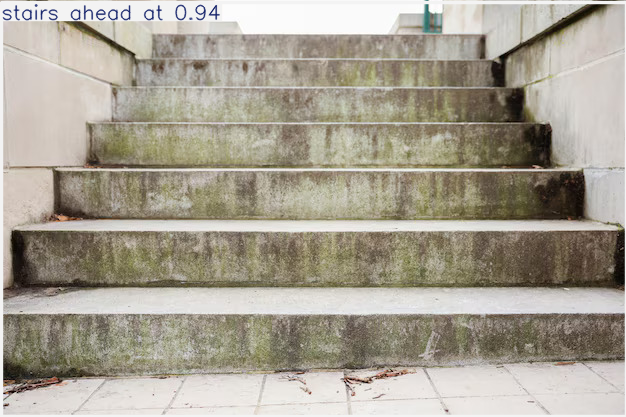

In [10]:
# Perform inference on an image
results = model("/kaggle/input/pictures/cement_stairs.jpg")

# Display results
for result in results:
    result.show()

**The model successfully identified the above as stairs**


image 1/1 /kaggle/input/person-image/person_approaching.jpg: 448x640 1 person ahead at, 6.6ms
Speed: 1.8ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


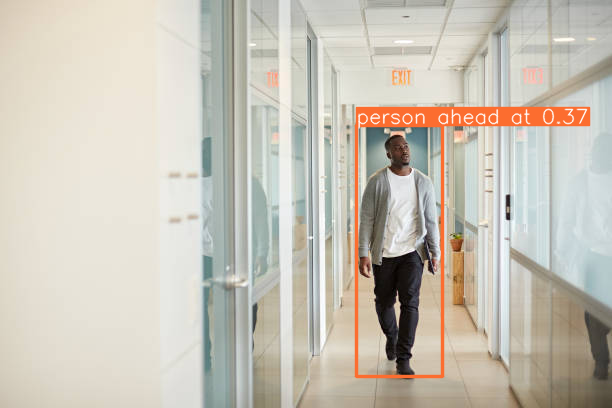

In [11]:
# Perform inference on an image
results = model("/kaggle/input/person-image/person_approaching.jpg")

# Display results
for result in results:
    result.show()

**The person approaching was successfully identified by the model as someone ahead**

In [18]:
pip install onnx2tf tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 15.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Export the model to ONNX format
model.export(format="onnx")

Ultralytics 8.3.81 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'my_yolo_project/visually_impaired_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 34, 8400) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.0s, saved as 'my_yolo_project/visually_impaired_model/weights/best.onnx' (11.7 MB)

Export complete (1.2s)
Results saved to /kaggle/working/my_yolo_project/visually_impaired_model/weights
Predict:         yolo predict task=detect model=my_yolo_project/visually_impaired_model/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=my_yolo_project/visually_impaired_model/weights/best.onnx imgsz=640 data=/kaggle/working/Visually-impaired-dataset-2/data.yaml  
Visualize:       https://netron.app


'my_yolo_project/visually_impaired_model/weights/best.onnx'

In [23]:
from IPython.display import FileLink

# the ONNX file
onnx_path = "/kaggle/working/my_yolo_project/visually_impaired_model/weights/best.onnx"

# Create a download link
FileLink(onnx_path)

/kaggle/working/my_yolo_project/visually_impaired_model/weights/best.onnx

In [25]:
pip install onnx_graphsurgeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install sng4onnx

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import onnx2tf

onnx_model_path = "/kaggle/working/my_yolo_project/visually_impaired_model/weights/best.onnx"
tf_model_path = "/kaggle/working/my_yolo_project/tf_model"

# Convert ONNX to TensorFlow SavedModel
onnx2tf.convert( input_onnx_file_path=onnx_model_path, output_folder_path=tf_model_path)


converter = tf.lite.TFLiteConverter.from_saved_model(tf_model_path)
tflite_model = converter.convert()

# Save the model
tflite_model_path = "/kaggle/working/my_yolo_project/visually_impaired_model/weights/best.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved!")


In [31]:
import tensorflow as tf

# Convert TensorFlow model to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(tf_model_path)
tflite_model = converter.convert()

# Save the .tflite model
with open("/kaggle/working/my_yolo_project/visually_impaired_model/weights/best.tflite", "wb") as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved!")

TensorFlow Lite model saved!


In [ ]:
# Load the trained YOLOv8 model
#model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")  # if it doesnt work i'll use best.onnx
#print('successfully loaded')

In [ ]:
from flask import Flask, render_template, Response
import cv2
from ultralytics import YOLO
from gtts import gTTS
import os
from flask_ngrok import run_with_ngrok

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when the app is run

# Load the trained YOLOv8 model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Function to generate audio feedback
def speak(text):
    tts = gTTS(text=text, lang='en')
    tts.save("output.mp3")
    os.system("mpg321 output.mp3")  # Play the audio (install mpg321 for Linux)

# Function to generate video frames with object detection
def generate_frames():
    cap = cv2.VideoCapture(0)  # Use webcam (change to 1 if using an external camera)
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Perform object detection
        results = model(frame)

        # Process detection results
        for result in results:
            boxes = result.boxes
            for box in boxes:
                class_id = int(box.cls)
                class_name = model.names[class_id]
                confidence = float(box.conf)
                if confidence > 0.5:  # Only consider high-confidence detections
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
                    cv2.putText(frame, f"{class_name} {confidence:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Add label

                    # Provide audio feedback
                    speak(f"{class_name} detected")

        # Convert frame to JPEG format
        ret, buffer = cv2.imencode('.jpg', frame)
        frame = buffer.tobytes()

        # Yield the frame in byte format
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

# Route for the home page
@app.route('/')
def index():
    return render_template('index.html')

# Route for video feed
@app.route('/video_feed')
def video_feed():
    return Response(generate_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')

# Run the Flask app
if __name__ == '__main__':
    app.run()